In [1]:
# чтобы предупреждения глаза не мазолили
import warnings
warnings.filterwarnings('ignore')

import torch
import pandas as pd

import my_dataset
import train
import model

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print('using device:', device)

using device: cpu


In [3]:
DATASET_PATH = 'dataset/'

f0_channel_1, f0_channel_2, f0_channel_3 = my_dataset.load_data(DATASET_PATH + '0.txt')

f01_channel_1, f01_channel_2, f01_channel_3 = my_dataset.load_data(DATASET_PATH + '0_1.txt')
f02_channel_1, f02_channel_2, f02_channel_3 = my_dataset.load_data(DATASET_PATH + '0_2.txt')

f1_channel_1, f1_channel_2, f1_channel_3 = my_dataset.load_data(DATASET_PATH + '1.txt')
f11_channel_1, f11_channel_2, f11_channel_3 = my_dataset.load_data(DATASET_PATH + '1_1.txt')
f12_channel_1, f12_channel_2, f12_channel_3 = my_dataset.load_data(DATASET_PATH + '1_2.txt')

f2_channel_1, f2_channel_2, f2_channel_3 = my_dataset.load_data(DATASET_PATH + '2.txt')
f21_channel_1, f21_channel_2, f21_channel_3 = my_dataset.load_data(DATASET_PATH + '2_1.txt')
f22_channel_1, f22_channel_2, f22_channel_3 = my_dataset.load_data(DATASET_PATH + '2_2.txt')

f3_channel_1, f3_channel_2, f3_channel_3 = my_dataset.load_data(DATASET_PATH + '4.txt')
f31_channel_1, f31_channel_2, f31_channel_3 = my_dataset.load_data(DATASET_PATH + '4_1.txt')
f32_channel_1, f32_channel_2, f32_channel_3 = my_dataset.load_data(DATASET_PATH + '4_2.txt')

f4_channel_1, f4_channel_2, f4_channel_3 = my_dataset.load_data(DATASET_PATH + '6.txt')
f41_channel_1, f41_channel_2, f41_channel_3 = my_dataset.load_data(DATASET_PATH + '6_1.txt')
f42_channel_1, f42_channel_2, f42_channel_3 = my_dataset.load_data(DATASET_PATH + '6_2.txt')

f5_channel_1, f5_channel_2, f5_channel_3 = my_dataset.load_data(DATASET_PATH + '10.txt')
f51_channel_1, f51_channel_2, f51_channel_3 = my_dataset.load_data(DATASET_PATH + '10_1.txt')
f52_channel_1, f52_channel_2, f52_channel_3 = my_dataset.load_data(DATASET_PATH + '10_2.txt')

f6_channel_1, f6_channel_2, f6_channel_3 = my_dataset.load_data(DATASET_PATH + '15.txt')
f61_channel_1, f61_channel_2, f61_channel_3 = my_dataset.load_data(DATASET_PATH + '15_1.txt')
f62_channel_1, f62_channel_2, f62_channel_3 = my_dataset.load_data(DATASET_PATH + '15_2.txt')

f7_channel_1, f7_channel_2, f7_channel_3 = my_dataset.load_data(DATASET_PATH + 'фасоль.txt')
f71_channel_1, f71_channel_2, f71_channel_3 = my_dataset.load_data(DATASET_PATH + 'фасоль_1.txt')
f72_channel_1, f72_channel_2, f72_channel_3 = my_dataset.load_data(DATASET_PATH + 'фасоль_2.txt')
f73_channel_1, f73_channel_2, f73_channel_3 = my_dataset.load_data(DATASET_PATH + 'фасоль_3.txt')


In [4]:
len(f1_channel_1)

68000

In [5]:
from dataset_processing import split_data_to_dataframe
NUM_CLASSES = 8
FRAME = 10000
STRIDE = 200
SMOOTHING = 5

f0_dataset = split_data_to_dataframe(f0_channel_1, f0_channel_2, f0_channel_3, label=0, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)

f01_dataset = split_data_to_dataframe(f01_channel_1, f01_channel_2, f01_channel_3, label=0, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f02_dataset = split_data_to_dataframe(f02_channel_1, f02_channel_2, f02_channel_3, label=0, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)

f1_dataset = split_data_to_dataframe(f1_channel_1, f1_channel_2, f1_channel_3, label=1, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f11_dataset = split_data_to_dataframe(f11_channel_1, f11_channel_2, f11_channel_3, label=1, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f12_dataset = split_data_to_dataframe(f12_channel_1, f12_channel_2, f12_channel_3, label=1, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)

f2_dataset = split_data_to_dataframe(f2_channel_1, f2_channel_2, f2_channel_3, label=2, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f21_dataset = split_data_to_dataframe(f21_channel_1, f21_channel_2, f21_channel_3, label=2, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f22_dataset = split_data_to_dataframe(f22_channel_1, f22_channel_2, f22_channel_3, label=2, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)

f3_dataset = split_data_to_dataframe(f3_channel_1, f3_channel_2, f3_channel_3, label=3, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f31_dataset = split_data_to_dataframe(f31_channel_1, f31_channel_2, f31_channel_3, label=3, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f32_dataset = split_data_to_dataframe(f32_channel_1, f32_channel_2, f32_channel_3, label=3, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)

f4_dataset = split_data_to_dataframe(f4_channel_1, f4_channel_2, f4_channel_3, label=4, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f41_dataset = split_data_to_dataframe(f41_channel_1, f41_channel_2, f41_channel_3, label=4, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f42_dataset = split_data_to_dataframe(f42_channel_1, f42_channel_2, f42_channel_3, label=4, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)

f5_dataset = split_data_to_dataframe(f5_channel_1, f5_channel_2, f5_channel_3, label=5, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f51_dataset = split_data_to_dataframe(f51_channel_1, f51_channel_2, f51_channel_3, label=5, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f52_dataset = split_data_to_dataframe(f52_channel_1, f52_channel_2, f52_channel_3, label=5, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)

f6_dataset = split_data_to_dataframe(f6_channel_1, f6_channel_2, f6_channel_3, label=6, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f61_dataset = split_data_to_dataframe(f61_channel_1, f61_channel_2, f61_channel_3, label=6, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f62_dataset = split_data_to_dataframe(f62_channel_1, f62_channel_2, f62_channel_3, label=6, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)

f7_dataset = split_data_to_dataframe(f7_channel_1, f7_channel_2, f7_channel_3, label=7, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f71_dataset = split_data_to_dataframe(f71_channel_1, f71_channel_2, f71_channel_3, label=7, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f72_dataset = split_data_to_dataframe(f72_channel_1, f72_channel_2, f72_channel_3, label=7, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f73_dataset = split_data_to_dataframe(f73_channel_1, f73_channel_2, f73_channel_3, label=7, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING) 




In [6]:
f6_dataset

,data,label
0,"[547.1286106450538, 12.34692767063789, 16.8076...",6
1,"[548.6590598118984, 12.967654216263433, 15.567...",6
2,"[548.8934530561763, 13.26645674818496, 15.7280...",6
3,"[548.5156393210751, 12.15303855035992, 15.7494...",6
4,"[552.8058298313392, 22.14116382896923, 25.5937...",6
...,...,...
294,"[553.7744657072312, 13.744567134703729, 12.942...",6
295,"[552.0390127957153, 10.132041185053328, 12.150...",6
296,"[545.3742733665646, 7.315622540571388, 10.8695...",6
297,"[545.7788835688945, 9.017197068247679, 12.8171...",6


In [7]:

final_dataset = pd.concat([f0_dataset, f01_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f02_dataset], ignore_index=True)

final_dataset = pd.concat([final_dataset, f1_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f11_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f12_dataset], ignore_index=True)

final_dataset = pd.concat([final_dataset, f2_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f21_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f22_dataset], ignore_index=True)

final_dataset = pd.concat([final_dataset, f3_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f31_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f32_dataset], ignore_index=True)

final_dataset = pd.concat([final_dataset, f4_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f41_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f42_dataset], ignore_index=True)

final_dataset = pd.concat([final_dataset, f5_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f51_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f52_dataset], ignore_index=True)

final_dataset = pd.concat([final_dataset, f6_dataset], ignore_index=True)

final_dataset = pd.concat([final_dataset, f61_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f62_dataset], ignore_index=True)

final_dataset = pd.concat([final_dataset, f7_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f71_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f72_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f73_dataset], ignore_index=True)


In [8]:
final_dataset

,data,label
0,"[540.6701354310643, 7.586658487255329, 5.00114...",0
1,"[540.4855296183972, 7.820531438332834, 5.00047...",0
2,"[540.343489082321, 8.138987086637663, 5.311885...",0
3,"[540.3871971895604, 7.935724000694982, 5.02435...",0
4,"[539.6580238271247, 7.199957791112064, 5.06358...",0
...,...,...
6090,"[546.3085170250981, 5.708948061821255, 6.06090...",7
6091,"[548.372972332348, 8.724056446494057, 8.997243...",7
6092,"[547.7217851485583, 5.7061920773711075, 5.5391...",7
6093,"[546.1593239287446, 6.793966245914175, 7.16240...",7


In [9]:
train_dataset, valid_dataset, test_dataset = my_dataset.train_val_test_split(final_dataset)

In [10]:
train_dataset

,data,label
4374,"[551.6999317419395, 22.58703835361151, 30.0565...",5
5882,"[547.3771998349569, 8.480430144392407, 12.5697...",7
4032,"[551.7725056304959, 19.7125983828464, 23.57114...",5
4765,"[555.1709576580092, 20.6547425627528, 23.33348...",6
3145,"[546.4635047939378, 10.767626720341285, 11.745...",4
...,...,...
4406,"[563.8038307884327, 26.646565486489354, 28.805...",5
328,"[542.058495108011, 4.6413951332568555, 4.78792...",0
4126,"[551.6253534731175, 22.073165426682, 34.337165...",5
4415,"[548.5273363099267, 12.791875768950556, 15.614...",5


In [11]:
train_dataset = train_dataset.reset_index(drop=True)
valid_dataset = valid_dataset.reset_index(drop=True)
test_dataset = test_dataset.reset_index(drop=True)

In [12]:
from custom_dataset import CustomDataset

train = CustomDataset(train_dataset)
valid = CustomDataset(valid_dataset)
test = CustomDataset(test_dataset)

In [13]:
print(train.data_frame)

                                                   data  label
0     [551.6999317419395, 22.58703835361151, 30.0565...      5
1     [547.3771998349569, 8.480430144392407, 12.5697...      7
2     [551.7725056304959, 19.7125983828464, 23.57114...      5
3     [555.1709576580092, 20.6547425627528, 23.33348...      6
4     [546.4635047939378, 10.767626720341285, 11.745...      4
...                                                 ...    ...
5480  [563.8038307884327, 26.646565486489354, 28.805...      5
5481  [542.058495108011, 4.6413951332568555, 4.78792...      0
5482  [551.6253534731175, 22.073165426682, 34.337165...      5
5483  [548.5273363099267, 12.791875768950556, 15.614...      5
5484  [552.4755746815069, 15.276612622322139, 20.957...      4

[5485 rows x 2 columns]


In [14]:
from torch.utils.data import DataLoader

batch_size = 32 # размер батча
train = DataLoader(train, batch_size=batch_size, shuffle=True)
valid = DataLoader(valid, batch_size=batch_size, shuffle=False)
test = DataLoader(test, batch_size=batch_size, shuffle=False)


In [15]:
print(len(train))
for (data, label) in train:
    print(data.shape)
    print(label.shape)
    break

172
torch.Size([32, 1, 1, 3000])
torch.Size([32, 1])


In [16]:
import model
from train import train_model

net = model.Perceptron(3000, 8).to(device)

loss_history, best_model = train_model(train, valid, net, epochs=100, device=device)

Epoch [0/100], loss = 1.8812 acc_val = 0.5148
Epoch [1/100], loss = 1.6282 acc_val = 0.7279
Epoch [2/100], loss = 1.5048 acc_val = 0.8197
Epoch [3/100], loss = 1.4407 acc_val = 0.8426
Epoch [4/100], loss = 1.4248 acc_val = 0.8393
Epoch [5/100], loss = 1.4210 acc_val = 0.8557
Epoch [6/100], loss = 1.4141 acc_val = 0.8656
Epoch [7/100], loss = 1.4267 acc_val = 0.8721
Epoch [8/100], loss = 1.4094 acc_val = 0.8689
Epoch [9/100], loss = 1.4068 acc_val = 0.8689
Epoch [10/100], loss = 1.4054 acc_val = 0.8656
Epoch [11/100], loss = 1.4274 acc_val = 0.8721
Epoch [12/100], loss = 1.4050 acc_val = 0.8721
Epoch [13/100], loss = 1.4057 acc_val = 0.8525
Epoch [14/100], loss = 1.4046 acc_val = 0.8721
Epoch [15/100], loss = 1.4043 acc_val = 0.8656
Epoch [16/100], loss = 1.4025 acc_val = 0.8689
Epoch [17/100], loss = 1.4042 acc_val = 0.8721
Epoch [18/100], loss = 1.4091 acc_val = 0.8623
Epoch [19/100], loss = 1.4060 acc_val = 0.8721
Epoch [20/100], loss = 1.4016 acc_val = 0.8689
Epoch [21/100], loss = 

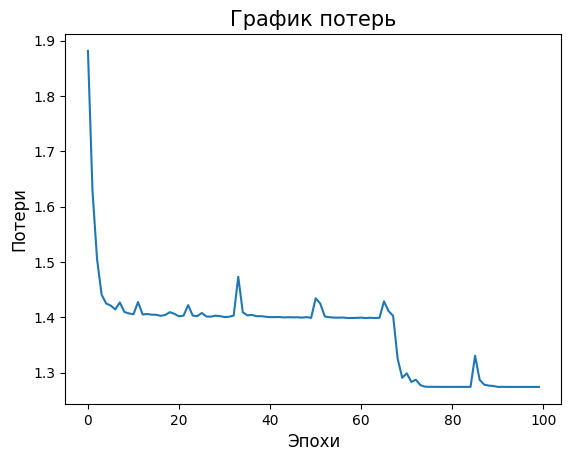

In [17]:
from matplotlib import pyplot as plt

plt.title('График потерь',fontsize=15)
plt.xlabel('Эпохи',fontsize=12)
plt.ylabel('Потери',fontsize=12)
plt.plot(loss_history)

plt.show()

In [18]:
from train import test_model

y_pred_test = test_model(model=best_model, loader_test=test, device=device)

In [19]:
import sklearn.metrics as metrics
import numpy as np

y_true_test = np.array(test_dataset["label"])

result_total = metrics.f1_score(y_true_test, y_pred_test, average='micro')
class_results = metrics.f1_score(y_true_test, y_pred_test, average=None)


print("Оценка качества F1 (общая):", result_total)
print()
print("Оценка качества F1 по классам:")
print("Оценка качества F1 (0):", class_results[0])
print("Оценка качества F1 (1):", class_results[1])
print("Оценка качества F1 (2):", class_results[2])
print("Оценка качества F1 (3):", class_results[3])
print("Оценка качества F1 (4):", class_results[4])
print("Оценка качества F1 (5):", class_results[5])
print("Оценка качества F1 (6):", class_results[6])
print("Оценка качества F1 (7):", class_results[7])

Оценка качества F1 (общая): 1.0

Оценка качества F1 по классам:
Оценка качества F1 (0): 1.0
Оценка качества F1 (1): 1.0
Оценка качества F1 (2): 1.0
Оценка качества F1 (3): 1.0
Оценка качества F1 (4): 1.0
Оценка качества F1 (5): 1.0
Оценка качества F1 (6): 1.0
Оценка качества F1 (7): 1.0
